In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
import csv
import numpy as np
import matplotlib.font_manager
# Read CSV
queries_data_ = pd.read_csv("Resources/Queries_Data_Set4b.csv", encoding="ISO-8859-1")
# Drop all rows with missing information
print(len(queries_data_))
queries_data = queries_data_.dropna(how='any')
queries_data.head()

631


,Search Query,Clicks,Impressions,CTR,Average Position,Intent,Group,Sub-Group,Search-Group
0,menu design shop,65,1205,5.39,1.17,#ff4000,Menu,Generic,Shop
1,menu us,63,121,52.07,1.84,#ff4000,Menu,Generic,Shop
2,menu furniture,138,3417,4.04,4.32,#ff4000,Menu,Generic,Furniture
3,menudesignshop,38,288,13.19,1.93,#ff4000,Menu,Generic,Shop
4,menu design store,13,41,31.71,1.00,#ff4000,Menu,Generic,Shop


In [3]:
queries_data['Group'].value_counts()

Menu                421
Product/Designer    167
Organic              43
Name: Group, dtype: int64

In [4]:
queries_data_grouped_sum = queries_data.groupby("Group").sum()
queries_data_grouped_avg = queries_data.groupby("Group").mean()
queries_data_grouped_sub_sum = queries_data_.groupby(["Search-Group"]).sum().reset_index()

queries_data_grouped_sub_sum

queries_data_grouped_intent_sum = queries_data.groupby(["Search-Group","Intent"]).sum().reset_index()
queries_data_grouped_intent_sum.head()

# print(queries_data_grouped_sub_sum)
# print()
# print(queries_data_grouped_intent_sum)
queries_data_grouped_sum = queries_data_grouped_sum.reset_index()
queries_data_grouped_avg = queries_data_grouped_avg.reset_index()
# queries_data_grouped_sub_sum = queries_data_grouped_sub_sum.reset_index()

# queries_data_grouped_sub_prod_sum = queries_data_grouped_sub_sum.loc[(queries_data_grouped_sub_sum["Sub-Group"] == 'Product')]     
# queries_data_grouped_sub_designer_sum = queries_data_grouped_sub_sum.loc[(queries_data_grouped_sub_sum["Sub-Group"] == 'Designer')]     
# queries_data_grouped_sub_generic_sum = queries_data_grouped_sub_sum.loc[(queries_data_grouped_sub_sum["Sub-Group"] == 'Generic')]     

# len(queries_data_grouped_sub_sum["Sub-Group"])

In [5]:
# queries_data_grouped_avg.head()
# queries_data_grouped_sub_sum
queries_data_grouped_sum.columns

Index(['Group', 'Clicks', 'Impressions', 'CTR', 'Average Position'], dtype='object')

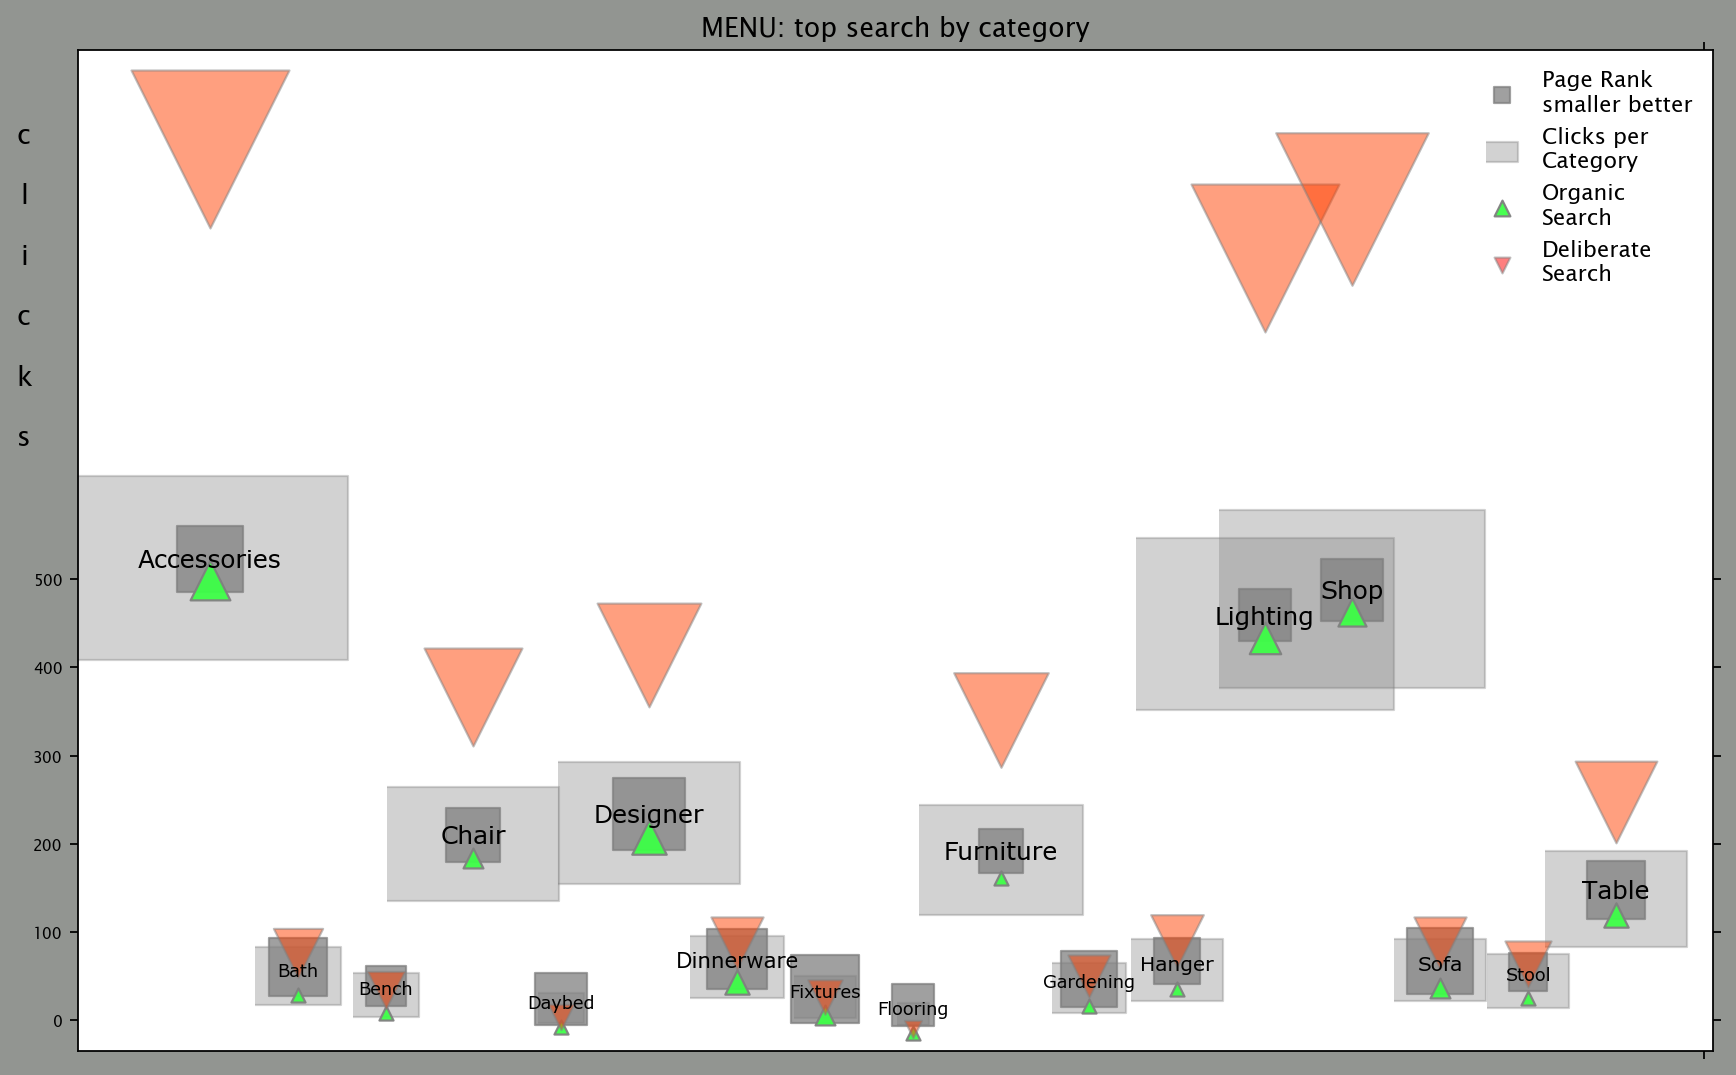

In [11]:
queries_data.groupby("Group").sum()

# multy = 5
# fig, ax2 = plt.subplots(figsize=(1.6*multy,3.9*multy), dpi=80) 
# img = plt.imread("Images/MENU_logo.jpg")
# ax2.imshow(img, extent=[0, 800, 0, 480])  # origin='upper',
# fig.patch.set_facecolor('xkcd:grey')

# fig.canvas.draw()
fig, ax2= plt.subplots(figsize=(11,7), dpi=160) 
fig.patch.set_facecolor('xkcd:grey')

# ax2 = plt.subplot(111)
ax2.set_xlim(-1.5,17.1)
ax2.set_ylim(-35, 1100)

comic_font = {'fontname':'Comic Sans MS'}
verdana_font = {'fontname':'Verdana'}
helvetica_font = {'fontname':'Helvetica'}
lucida_font = {'fontname':'Lucida Sans'}

# fig.autofmt_xdate()
fig.tight_layout()
plt.subplots_adjust(top=0.95)

# Add ellipses
# rx, ry = 3., 1.1
# area = rx * ry * np.pi
# theta = np.arange(0, 2 * np.pi + 0.02, 0.1)
# verts = np.column_stack([rx / area * np.cos(theta), ry / area * np.sin(theta)])

# avg_pos_search["Average Position"]
avg_pos_search = queries_data.groupby(["Search-Group"]).mean()
intent = avg_pos_search["Average Position"]
# intent = intent_.astype(float)

# Add rectangles
v_val=1.0
h_val=1.5
j=0
# verts = list(zip([-h_val*2,h_val*2,h_val*2,-h_val*2],[-v_val*2,-v_val*2,v_val*2,v_val*2]))
verts1 = list(zip([-h_val*2,h_val*.005*intent[j],h_val*.005*intent[j],-h_val*2],[-v_val*2,-v_val*2,v_val*2,v_val*2]))
verts2 = list(zip([-h_val*2,h_val*2,h_val*2,-h_val*2],[-v_val*2,-v_val*2,v_val*2,v_val*2]))
verts3 = list(zip([-h_val*1,h_val*.5,h_val*.5,-h_val*1],[-v_val*2,-v_val*2,v_val*2,v_val*2]))
verts4 = list(zip([-h_val*1,h_val*.5,h_val*1,-h_val*.5],[-v_val*2,-v_val*2,v_val*2,v_val*2]))

# queries_data_grouped_sub_clicks_sum_int = queries_data_grouped_sub_clicks_sum.reset_index(drop=True).astype(int)  
queries_data_grouped_sub_clicks_sum = queries_data_grouped_sub_sum["Clicks"]
avg_pos_search = queries_data.groupby(["Search-Group","Average Position"]).mean().reset_index()
avg_pos_search = avg_pos_search.groupby("Search-Group").mean()
actual_intent = queries_data.groupby(["Intent","Search-Group"]).count().reset_index()
actual_intent1 = queries_data.groupby(["Intent","Search-Group"]).sum().reset_index()

#########################################33
j=0
for box in range(0,17):
#     verts1 = list(zip([-h_val*intent[j],h_val*intent[j],h_val*intent[j],-h_val*intent[j]],[-v_val*2,-v_val*2,v_val*2,v_val*2]))
    ax2.scatter(queries_data_grouped_sub_sum["Search-Group"][j], queries_data_grouped_sub_sum["Clicks"][j]+10, 
            marker="s",  edgecolor='grey', facecolor="grey", alpha=.75, 
            label=(j//1)*"_"+str("Page Rank\nsmaller better"),
            s=avg_pos_search["Average Position"][j]*110)  
#     print(intent[j])

#     verts2 = list(zip([-h_val*2,h_val*2,h_val*2,-h_val*2],[-v_val*2,-v_val*2,v_val*2,v_val*2]))
    ax2.scatter(queries_data_grouped_sub_sum["Search-Group"][j], queries_data_grouped_sub_sum["Clicks"][j], 
            marker=verts2,  edgecolor='grey', facecolor="gray", alpha=.35, 
            label=(j//1)*"_"+str("Clicks per\nCategory"),
            s=queries_data_grouped_sub_sum["Clicks"][j]*30) 
    j+=1

# queries_data_sg_reset = queries_data_grouped_sub_sum["Search-Group"].reset_index(drop=True)
# queries_data_sg_reset17 = queries_data_grouped_sub_sum["Search-Group"].reset_index(drop=True)  # queries_data_sg_reset.index = range(17,34)
# queries_data_sg_reset = pd.concat([queries_data_sg_reset, queries_data_sg_reset17]).reset_index(drop=True)

actual_intent_ = actual_intent.reset_index(drop=True)

j=0
for box_intent in range(0,34):
#     verts3 = list(zip([-h_val*intent[j],h_val*intent[j],h_val*intent[j],-h_val*intent[j]],[-v_val*2,-v_val*2,v_val*2,v_val*2]))
    if j <= 16:
        ax2.scatter(queries_data_grouped_sub_sum["Search-Group"][j], 
            queries_data_grouped_sub_sum["Clicks"][j]+actual_intent1["Clicks"][j]-22, 
            marker="^",  edgecolor='grey', facecolor=actual_intent1["Intent"][j], alpha=.95,
            label=(j//1)*"_"+str("Organic\nSearch"),
            s=actual_intent["Clicks"][j]*40)  
#         print(actual_intent1["Clicks"][3]*actual_intent["Clicks"][j])  queries_data_grouped_sub_sum
        j+=1
    elif j > 16 and j <34:
        ax2.scatter(actual_intent1["Search-Group"][j], actual_intent1["Clicks"][j]+actual_intent1["Clicks"][j]-22, 
            marker="v",  edgecolor='grey', facecolor=actual_intent1["Intent"][j], alpha=.5,  
#             label=(j//1)*"_"+str("big red"),
            s=actual_intent1["Clicks"][j]*10)  
        j+=1

######## Placeholder ax for Legend only  ###################
ax2.scatter(1, -100, marker="v",  edgecolor='grey', facecolor='r', alpha=.5, label=(1//2)*"_"+str("Deliberate\nSearch"),s=20)
#########################################################################################
    
i=0
for line in range(0,17):
    ax2.text(queries_data_grouped_sub_sum["Search-Group"][line], queries_data_grouped_sub_sum["Clicks"][line], 
             queries_data_grouped_sub_sum["Search-Group"][line], horizontalalignment='center',
             size=queries_data_grouped_sub_clicks_sum.clip(upper=70,lower=50)[i]*.16, 
             color='black', weight='medium', **verdana_font)     
    i+=1

# plt.xlabel('xlabel', fontsize=12, rotation='45', **verdana_font)
plt.ylabel('c\n\nl\n\ni\n\nc\n\nk\n\ns', y=.6, fontsize=12, rotation=0, **lucida_font)
# ax2.set_xlabel('X-axis', fontsize=12, rotation='45', **verdana_font)
# ax2.set_ylabel('Y-axis', fontsize=12, rotation='vertical', **verdana_font)
plt.title('MENU: top search by category', **lucida_font)
xlabelTicks = queries_data_grouped_sub_sum["Search-Group"]
ylabelTicks = queries_data_grouped_sub_sum["Clicks"]  
plt.xticks("", "", rotation='33', **lucida_font)
plt.yticks(range(0,600,100), range(0,600,100), rotation='0', **lucida_font)
ax2.tick_params(labelcolor='black', top='off', bottom='off', left='on', right='off')
ax2.set_yticklabels(range(0,600,100), ha="right", size=7, rotation=0)


lgnd = plt.legend(loc='upper right', fontsize=7, prop={'family': 'Lucida Sans'},
                  title="", title_fontsize=8, facecolor="white", frameon=False, framealpha=0)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [200]
lgnd.legendHandles[2]._sizes = [50]
lgnd.legendHandles[3]._sizes = [50]

plt.show()
# queries_data_grouped_sub_clicks_sum
# fig.savefig("Images/SEO_terms.png", facecolor=fig.get_facecolor())

# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
